# Classifying Airplane Accidents Based on Severity

## Context

In 2018, there were [15 airplane accidents](https://www.cnn.com/2019/01/02/health/plane-crash-deaths-intl/index.html) of varying severity each year, with over 500 deaths. Although airplane safety continues to increase each year, we are interested in knowing if this number can be reduced further. We plan to investigate this by predicting the severity of a crash based on crash details, and determining which factors weight the most heavily on the severity of an accident. 

[Data Source](https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/machine-learning/how-severe-can-an-airplane-accident-be-03e7a3f1/)

## Goals

We want to predict the severity of an airplane accident based on several features:
    - Number of days since inspection 
    - Total safety complains
    - An estimation of how much control the pilot had during the incident
    - Turbulence
    - Cabin temperature
    - Accident type
    - Max elevation achieved
    - Number of prior violations
    - Safety score (a measure of how safe the plane was deemed to be)
    
Our target variable is Severity. The Severity feature ranks the severity of each airplane accident one a scale of low damage with few/no injuries (Minor_Damage_And_Injuries) to high damage with fatalities (Highly_Fatal_And_Damaging). 

## Imports

In [21]:
import warnings
warnings.filterwarnings("ignore")

from data_cleaning import *

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

sns.set(style="whitegrid")

## Dataframe

#### Column Descriptors

Accident_ID: unique id assigned to each row

Accident_Type_Code: the type of accident (factor, not numeric)

Cabin_Temperature: the last recorded temperature before the incident, measured in degrees fahrenheit

Turbulence_In_gforces: the recorded/estimated turbulence experienced during the accident

Control_Metric: an estimation of how much control the pilot had during the incident given the factors at play

Total_Safety_Complaints: number of complaints from mechanics prior to the accident

Days_Since_Inspection: how long the plane went without inspection before the incident

Safety_Score: a measure of how safe the plane was deemed to be

Violations: number of violations that the aircraft received during inspections

Severity: a description (4 level factor) on the severity of the crash

***missing descriptors: Max_Elevation, Adverse_Weather_Metric***

In [9]:
# load in dataframe
df_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,2,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


## Feature Variable Distributions 

In [ ]:
# plot each feature distribution 

# Modeling

We will try a few different modeling methods to see which one produces the most accurate results:

- Logistic regression
- Basic decision tree classifier, bagged
- Random forest
- KNN


### Logistic Regression 

In [10]:
lr = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = lr.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_hat_test = model_log.predict(X_test)
y_hat_train = model_log.predict(X_train)

#### Evaluation Metrics

- precision
- recall 
- accuracy
- f1 score

- roc curve
- auc

### Bagged Tree

The bagged tree is a simple decision tree classifier that uses bagging to encourage diveristy in the "trees" our model samples. By bagging, we perform sampling with replacement which uses random parts of the dataset instead of the entire dataset.

In [43]:
# Perform a GridSearch to find the best parameters to use
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

##### GridSearch finds the best paramaters for our model to be the most accurate

Our best paramaters for the Bagged Tree Model are:
- criterion = entropy
- max depth = 10
- min sample split = 10

In [24]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10), 
                                 n_estimators=20)

bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=10,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None

#### Tuning the Bagged Tree Model

In [25]:
# accuracy score 
print("Training data accuracy score:", bagged_tree.score(X_train, y_train))
print("Test data accuracy score:", bagged_tree.score(X_test, y_test))

Training data accuracy score: 0.9768
Test data accuracy score: 0.9436


### Random Forest

The Random Forest algorithm is a supervised learning algorithm that can be used for classification. It is an ensemble of decision tree classifiers. Ensemble methods are naturally robust because they are resistant to variance in the data. 

In [38]:
# Perform a GridSearch to find the best parameters to use
rf_clf = RandomForestClassifier()

rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

##### GridSearch finds the best paramaters for our model to be the most accurate

Our best paramaters for the Random Forest Model are:
- criterion = entropy
- max depth = None
- min sample leaf = 3
- min sample split = 5
- n estimators = 100

In [39]:
# instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=3)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
print("Training data accuracy score:", forest.score(X_train, y_train))
print("Test data accuracy score:", forest.score(X_test, y_test))

Training data accuracy score: 0.9884
Test data accuracy score: 0.9256


#### Plotting Feature Importance

Feature importance is exactly what it sounds like: it tells us the most important features for our model predictions.

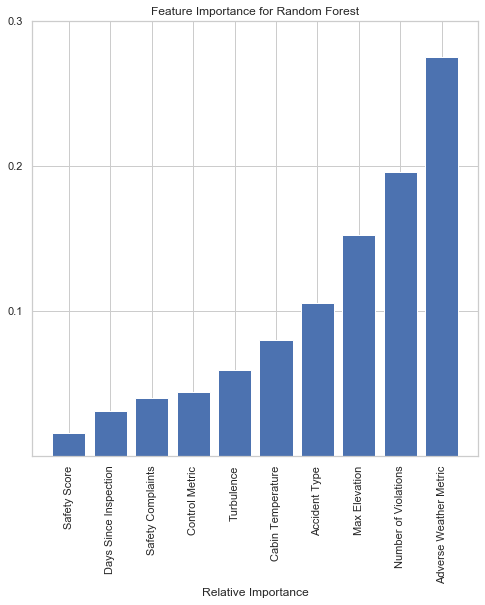

In [16]:
importances = forest.feature_importances_
indices = np.argsort(importances)
y_ticks = [0.1, 0.2, 0.3]

plt.figure(figsize=(8,8))
plt.title('Feature Importance for Random Forest')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(y_ticks)
plt.xticks(np.arange(10), ('Safety Score', 'Days Since Inspection', 'Safety Complaints', 'Control Metric', 'Turbulence', 'Cabin Temperature', 'Accident Type', 'Max Elevation', 'Number of Violations', 'Adverse Weather Metric'), rotation = 90)
plt.xlabel('Relative Importance')
plt.show()

### KNN

In [ ]:
# scaling the X_train data using StandardScaler
#X_train = X_train
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(X_train)

#scaled_data